In [31]:
# importing necessary library
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
# loading the data-set

data = pd.read_csv(r"C:\Users\User\Desktop\Warranty-Claims-Fraud-Prediction\data\cleaned-data\df_Clean.csv")
data.head()

,Unnamed: 0,Region,State,Area,City,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,...,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Purchased_from,Call_details,Purpose,Fraud
0,0,South,Karnataka,Urban,Bangalore,Business,Entertainment,TV,0,0,...,1,2,0,15000.0,10,60,Manufacturer,0.5,Complaint,1
1,1,South,Karnataka,Rural,Bangalore,Business,Household,AC,1,1,...,0,0,0,20000.0,12,10,Dealer,1.0,Complaint,0
2,2,North,Haryana,Urban,Chandigarh,Personal,Household,AC,0,1,...,0,0,0,18000.0,14,10,Dealer,1.4,Claim,0
3,3,South,Tamil Nadu,Urban,Chennai,Business,Entertainment,TV,0,0,...,1,1,0,12000.0,16,20,Manufacturer,2.0,Complaint,0
4,4,North East,Jharkhand,Rural,Ranchi,Personal,Entertainment,TV,0,0,...,0,1,2,25000.0,15,6,Dealer,1.3,Claim,0


# data preprocessing part 1

In [33]:
data.shape

(358, 21)

In [34]:
# dropping columns not needed in the dataset
data.drop (["Unnamed: 0"], axis=1, inplace=True)

In [35]:
# checking for the sum of  null values in each columns
data.isnull().sum()

Region              0
State               0
Area                0
City                0
Consumer_profile    0
Product_category    0
Product_type        0
AC_1001_Issue       0
AC_1002_Issue       0
AC_1003_Issue       0
TV_2001_Issue       0
TV_2002_Issue       0
TV_2003_Issue       0
Claim_Value         0
Service_Centre      0
Product_Age         0
Purchased_from      0
Call_details        0
Purpose             0
Fraud               0
dtype: int64

In [36]:
# checking for duplicates
data.duplicated().sum()

0

In [37]:
# checking the data type of each columns
data.dtypes

Region               object
State                object
Area                 object
City                 object
Consumer_profile     object
Product_category     object
Product_type         object
AC_1001_Issue         int64
AC_1002_Issue         int64
AC_1003_Issue         int64
TV_2001_Issue         int64
TV_2002_Issue         int64
TV_2003_Issue         int64
Claim_Value         float64
Service_Centre        int64
Product_Age           int64
Purchased_from       object
Call_details        float64
Purpose              object
Fraud                 int64
dtype: object

In [38]:
# checking for unique values in each columns
data.nunique()

Region                8
State                20
Area                  2
City                 27
Consumer_profile      2
Product_category      2
Product_type          2
AC_1001_Issue         3
AC_1002_Issue         3
AC_1003_Issue         3
TV_2001_Issue         3
TV_2002_Issue         3
TV_2003_Issue         3
Claim_Value         107
Service_Centre        7
Product_Age         188
Purchased_from        3
Call_details         37
Purpose               3
Fraud                 2
dtype: int64

In [39]:
data['AC_1001_Issue'].unique()


array([0, 1, 2], dtype=int64)

In [40]:
data['AC_1002_Issue'].unique()

array([0, 1, 2], dtype=int64)

In [41]:
data['AC_1003_Issue'].unique()

array([0, 2, 1], dtype=int64)

In [42]:
data["AC_1001_Issue"] = data["AC_1001_Issue"].map({ 0: "No issues", 1: "Repair", 2: "Replacement"})


In [43]:
data["AC_1002_Issue"] = data["AC_1002_Issue"].map({0: "No issues", 1: "Repair", 2: "Replacement"})

In [44]:
data["AC_1003_Issue"] = data["AC_1003_Issue"].map({0: "No issues", 1: "Repair", 2: "Replacement"})

In [45]:
data["TV_2001_Issue"].unique()

array([1, 0, 2], dtype=int64)

In [46]:
data["TV_2001_Issue"] = data["TV_2001_Issue"].map({0: "No issues", 1: "Repair", 2: "Replacement"})

In [47]:
data["TV_2002_Issue"] = data["TV_2002_Issue"].map({0: "No issues", 1: "Repair", 2: "Replacement"})

In [48]:
data["TV_2003_Issue"] = data["TV_2003_Issue"].map({0: "No issues", 1: "Repair", 2: "Replacement"})

In [49]:
data.describe()

,Claim_Value,Service_Centre,Product_Age,Call_details,Fraud
count,358.000000,358.000000,358.000000,358.000000,358.000000
mean,11994.534916,12.812849,201.843575,11.931844,0.097765
std,12063.213579,1.766844,259.731564,11.559474,0.297413
min,0.000000,10.000000,3.000000,0.500000,0.000000
25%,4006.000000,12.000000,14.000000,1.600000,0.000000
50%,7194.000000,13.000000,60.000000,6.500000,0.000000
75%,15000.000000,15.000000,303.750000,23.000000,0.000000
max,50000.000000,16.000000,991.000000,30.000000,1.000000


In [50]:
data.head()

,Region,State,Area,City,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Purchased_from,Call_details,Purpose,Fraud
0,South,Karnataka,Urban,Bangalore,Business,Entertainment,TV,No issues,No issues,No issues,Repair,Replacement,No issues,15000.0,10,60,Manufacturer,0.5,Complaint,1
1,South,Karnataka,Rural,Bangalore,Business,Household,AC,Repair,Repair,No issues,No issues,No issues,No issues,20000.0,12,10,Dealer,1.0,Complaint,0
2,North,Haryana,Urban,Chandigarh,Personal,Household,AC,No issues,Repair,Replacement,No issues,No issues,No issues,18000.0,14,10,Dealer,1.4,Claim,0
3,South,Tamil Nadu,Urban,Chennai,Business,Entertainment,TV,No issues,No issues,No issues,Repair,Repair,No issues,12000.0,16,20,Manufacturer,2.0,Complaint,0
4,North East,Jharkhand,Rural,Ranchi,Personal,Entertainment,TV,No issues,No issues,No issues,No issues,Repair,Replacement,25000.0,15,6,Dealer,1.3,Claim,0


## Exploratory data analysis

### Location Based distibution of fraudulent claims

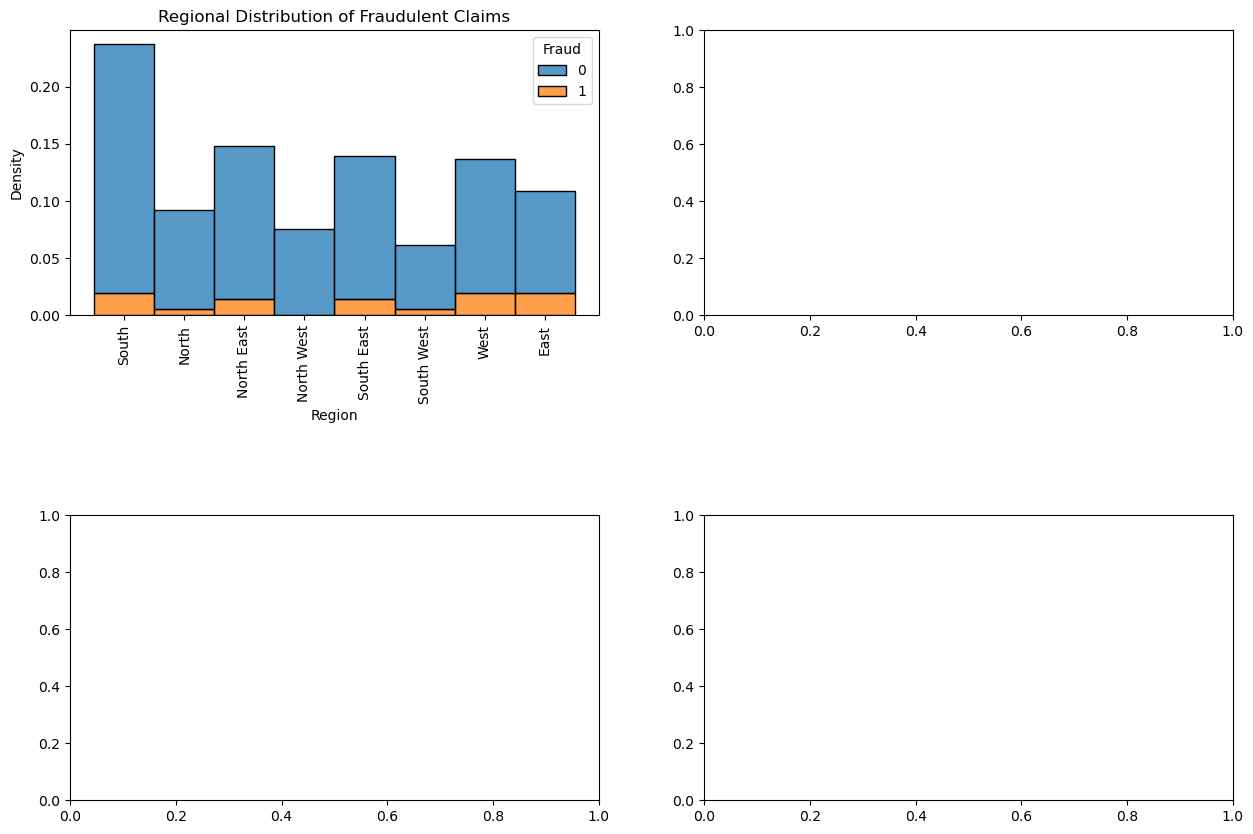

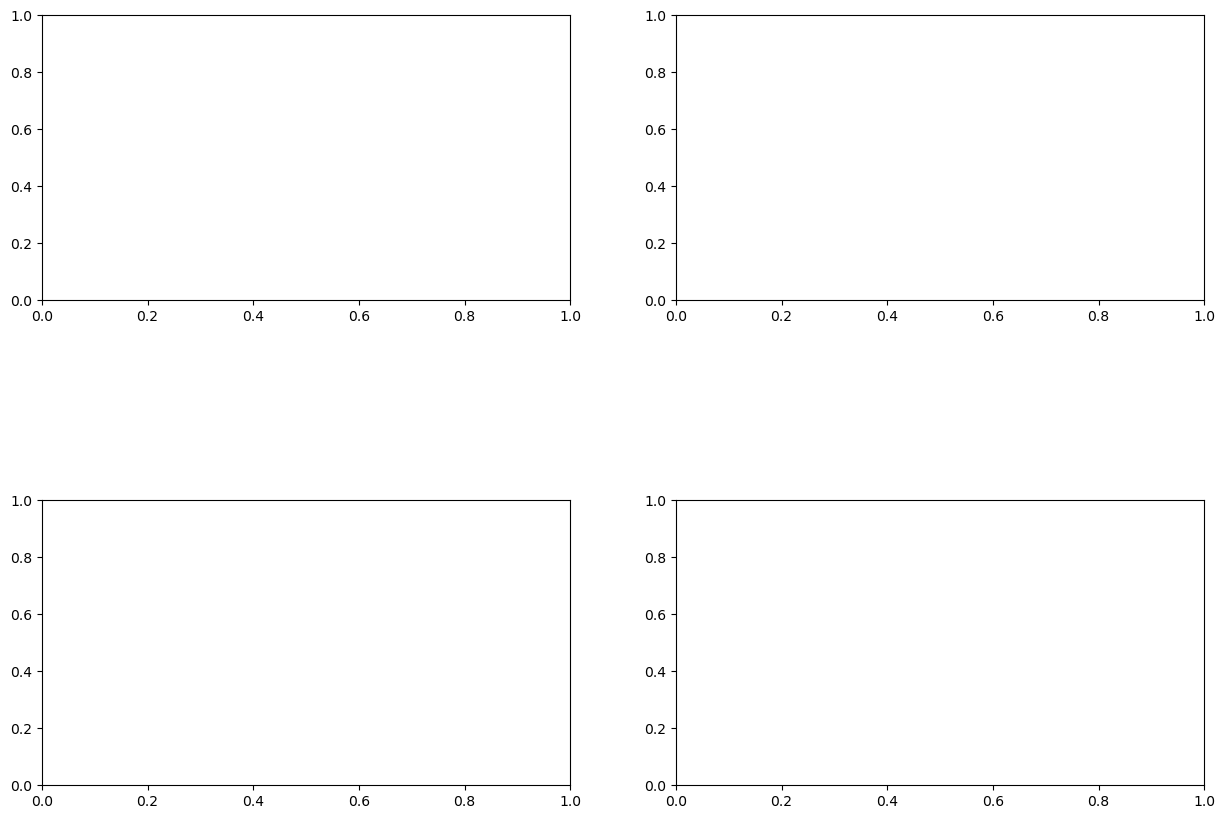

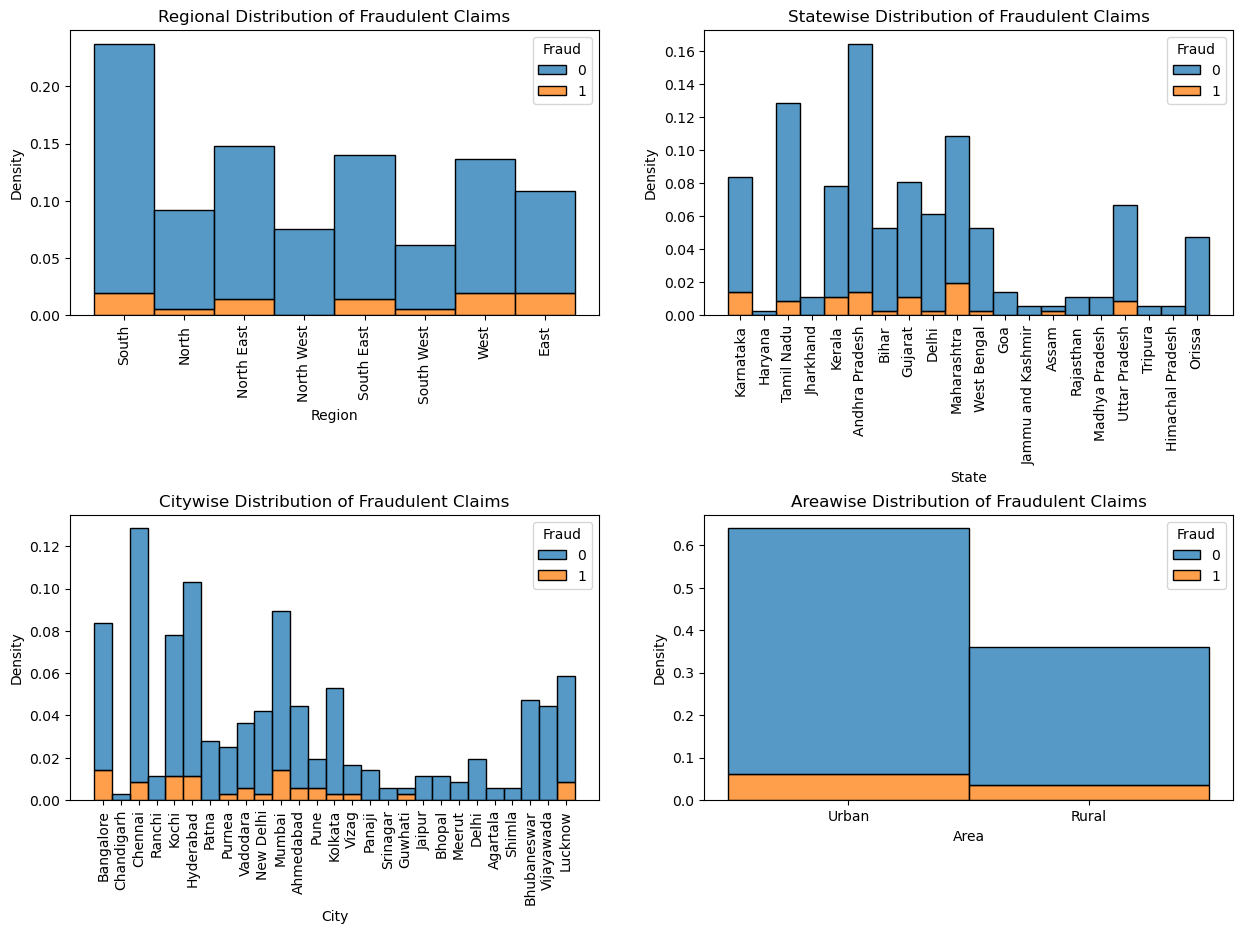

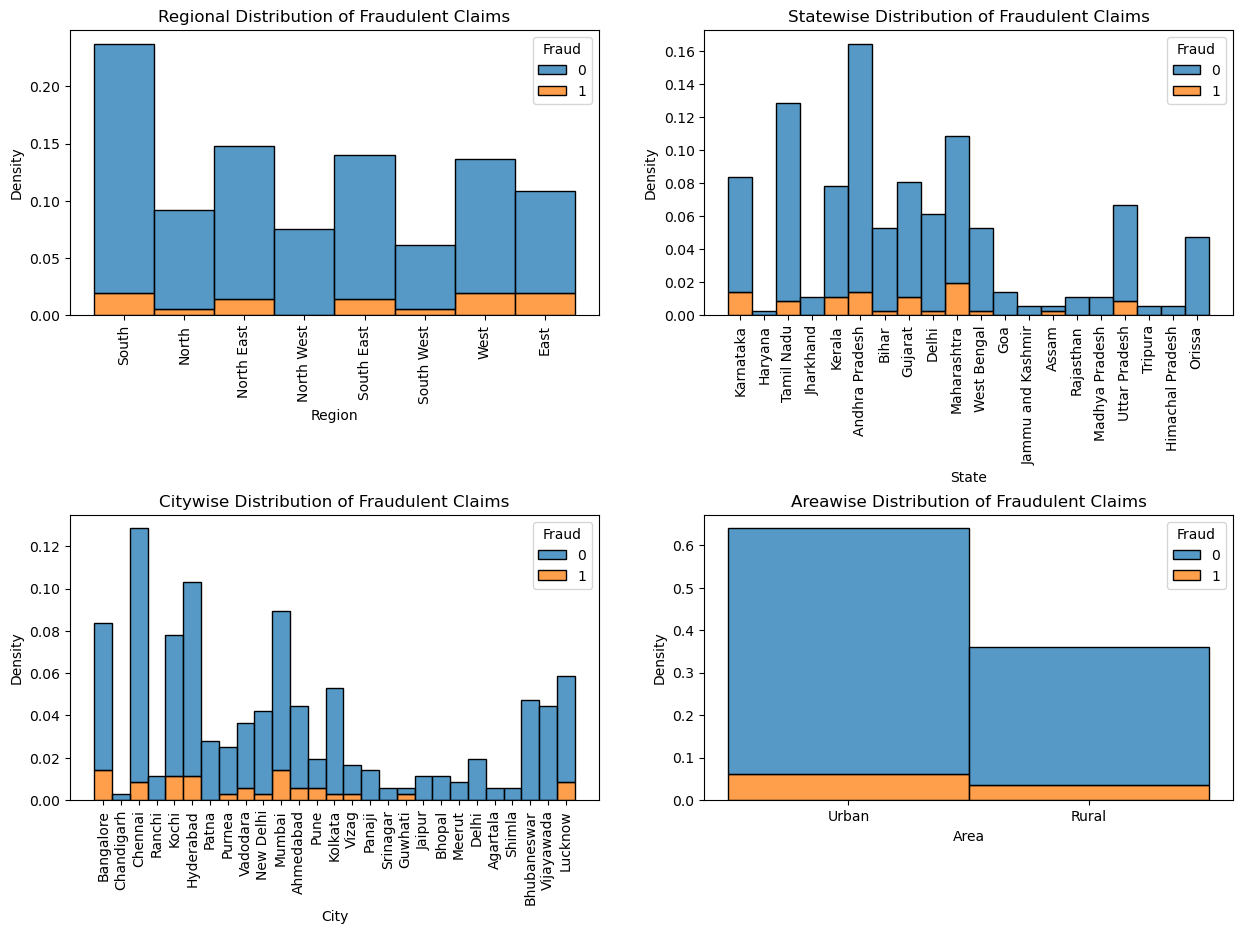

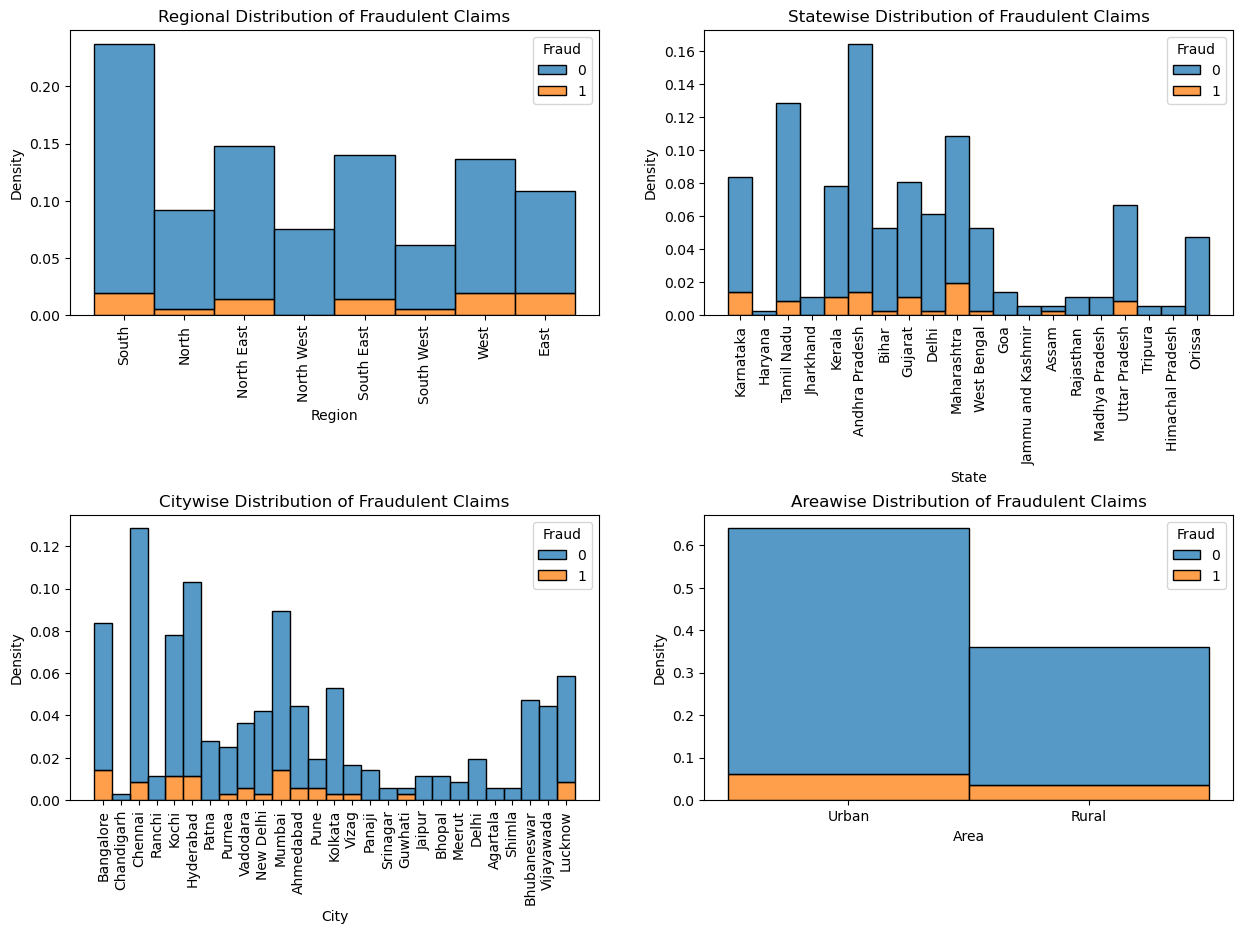

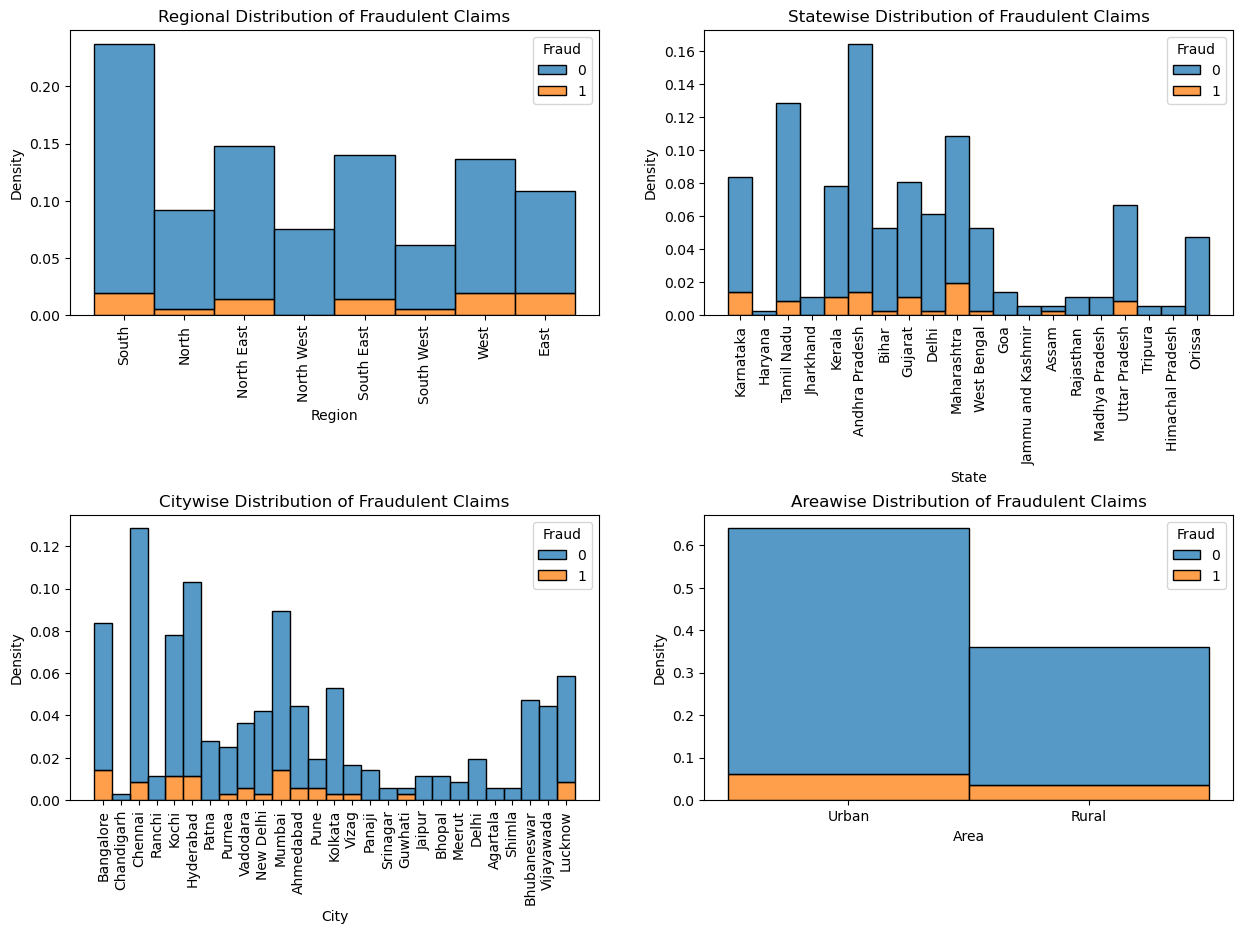

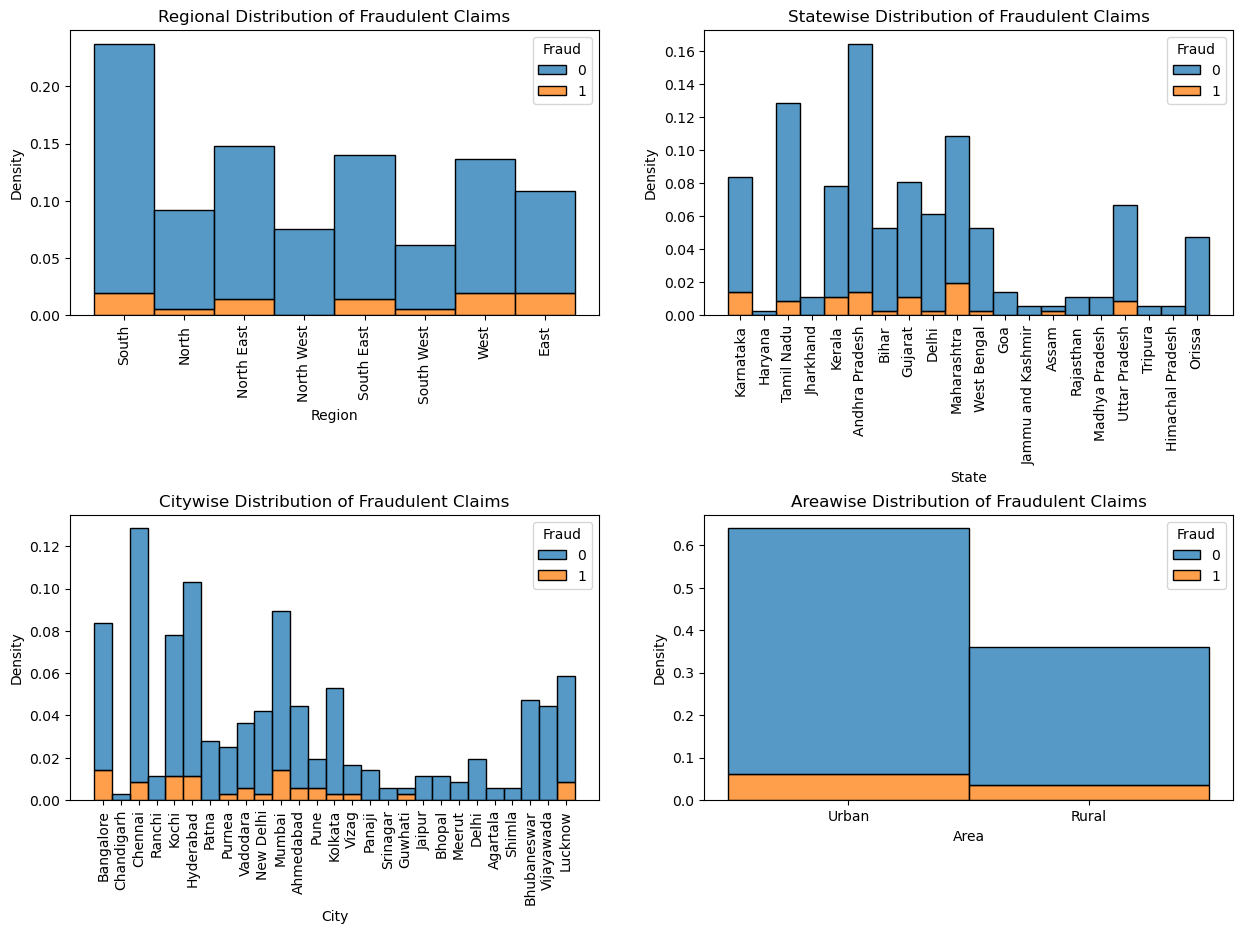

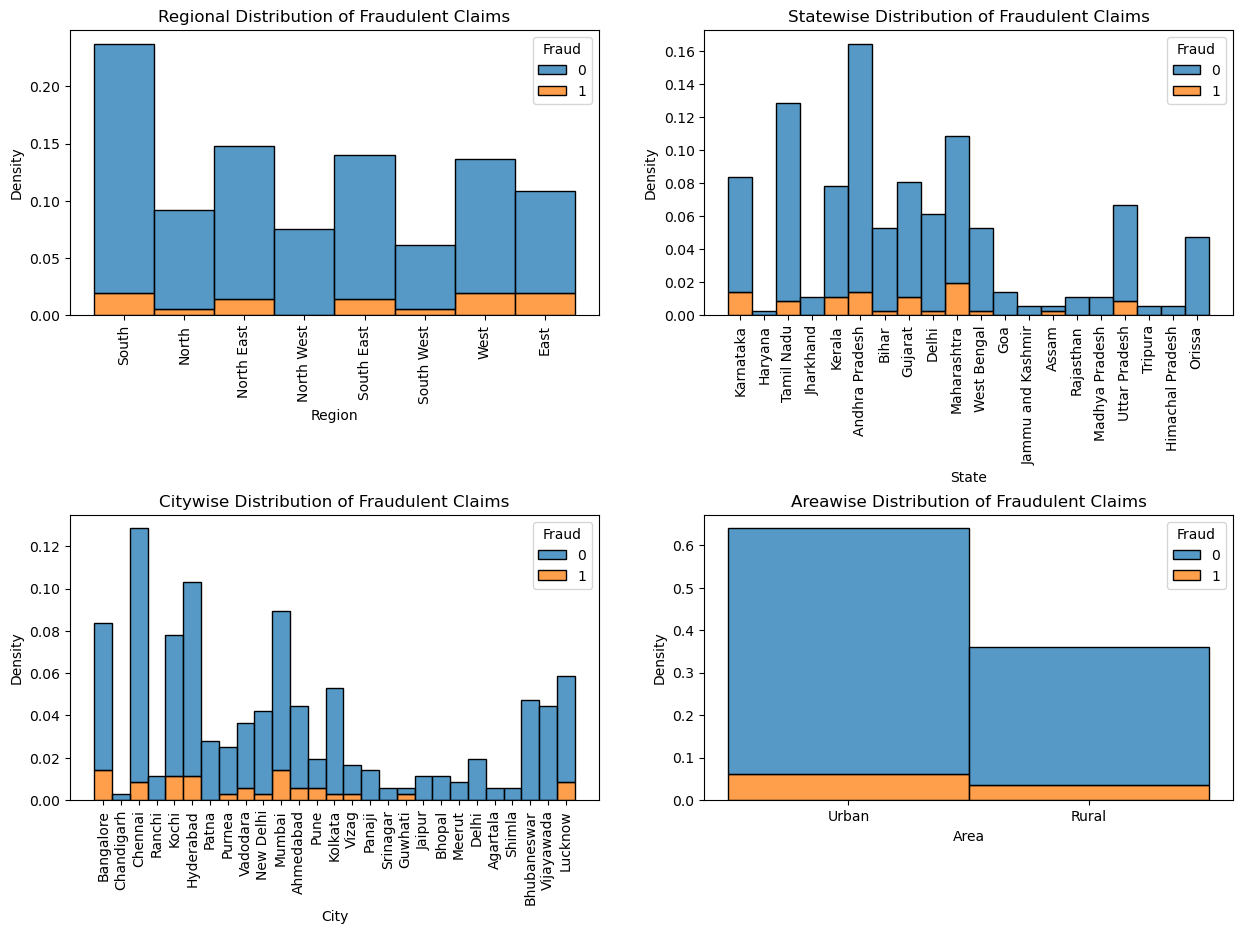

In [56]:
fig, ax = plt.subplots(2,2,figsize=(15,10))
fig.subplots_adjust(hspace=0.7)

sns.histplot(x = 'Region', data = data, ax =ax[0,0], hue = 'Fraud', element='bars', fill=True, stat='density',multiple='stack').set(title='Regional Distribution of Fraudulent Claims')
ax[0,0].xaxis.set_tick_params(rotation=90)

sns.histplot(x = 'State', data = data, ax =ax[0,1], hue = 'Fraud', element='bars', fill=True, stat='density',multiple='stack').set(title='Statewise Distribution of Fraudulent Claims')
ax[0,1].xaxis.set_tick_params(rotation=90)

sns.histplot(x = 'City', data = data, ax =ax[1,0], hue = 'Fraud', element='bars', fill=True, stat='density',multiple='stack').set(title='Citywise Distribution of Fraudulent Claims')
ax[1,0].xaxis.set_tick_params(rotation=90)

sns.histplot(x = 'Area', data = data, ax =ax[1,1], hue = 'Fraud', element='bars', fill=True, stat='density',multiple='stack').set(title='Areawise Distribution of Fraudulent Claims')
plt.show()


[Text(0.5, 1.0, 'Areawise Distribution of Fraudulent Claims')]